In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

d:\Anaconda\envs\pm3bap\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("SeoulBikeData.csv").drop(['Date', 'Holiday', 'Seasons'], axis = 1)

# axis = 0: This refers to the first axis, which is typically the vertical axis (rows) in a 2D array. When you apply an operation with axis = 0, it will be performed along the rows.

# axis = 1: This refers to the second axis, which is typically the horizontal axis (columns) in a 2D array. When you apply an operation with axis = 1, it will be performed along the columns.

# axis = -1: This refers to the last axis in the array. The axis is determined dynamically based on the array's shape, so it can be the first axis (for 1D arrays), the row axis (for 2D arrays), or the innermost axis for higher-dimensional arrays.

#df.head()
df['Functioning Day'] = (df['Functioning Day']=='Yes').astype(int)
df = df[df['Hour']==12] #will filter the DataFrame to include only the rows where the 'Hour' column has a value of 12.
df = df.drop(['Hour'], axis = 1)
df.head()



,Rented Bike Count,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


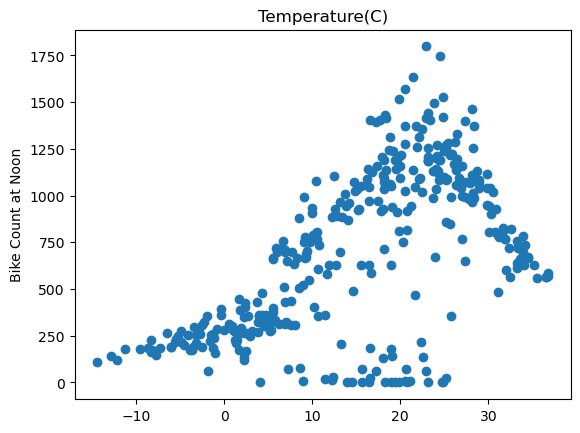

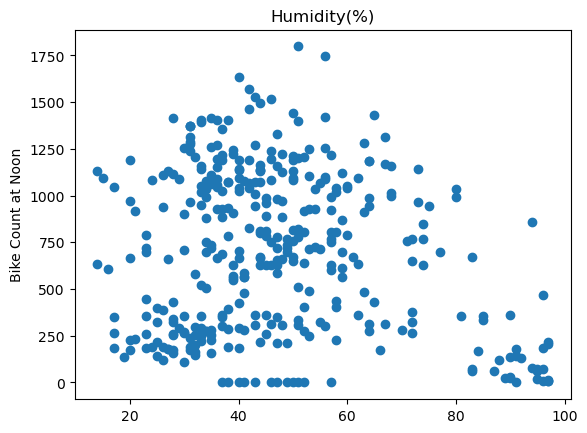

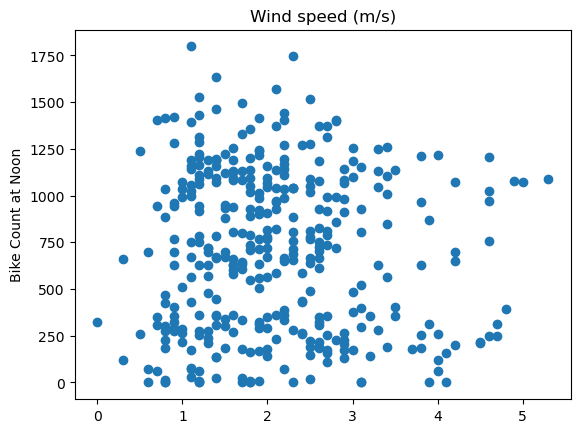

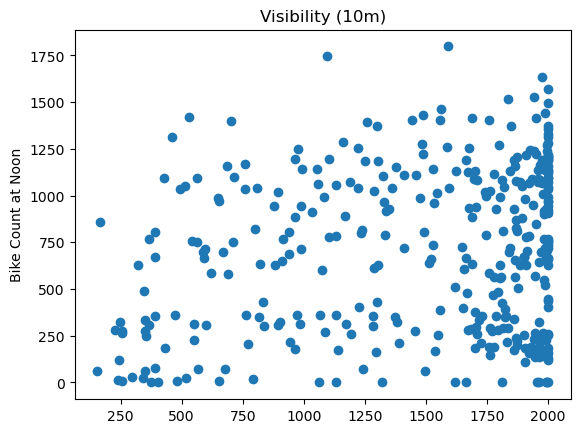

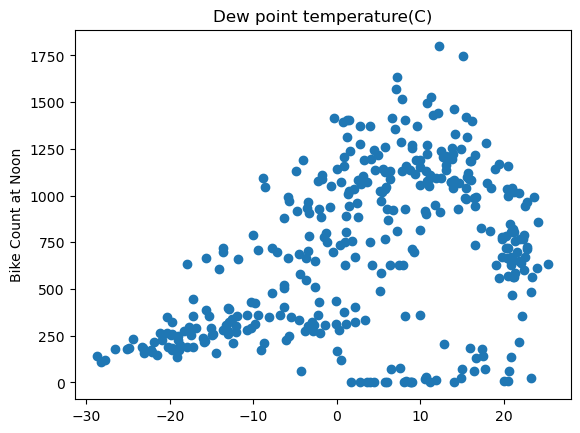

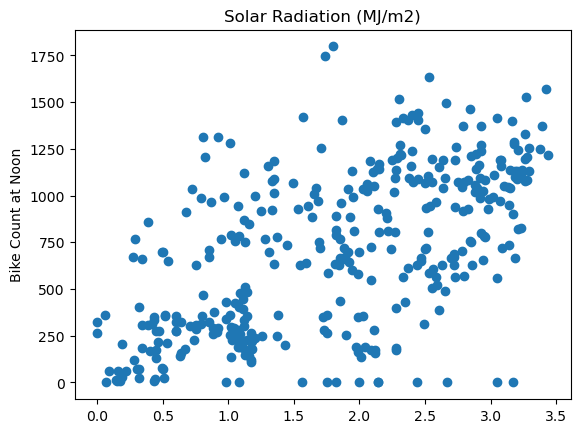

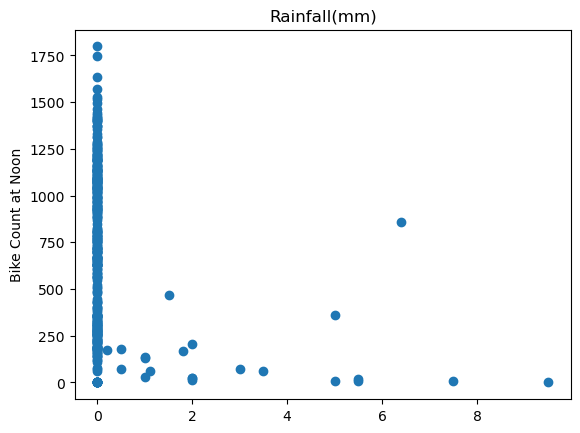

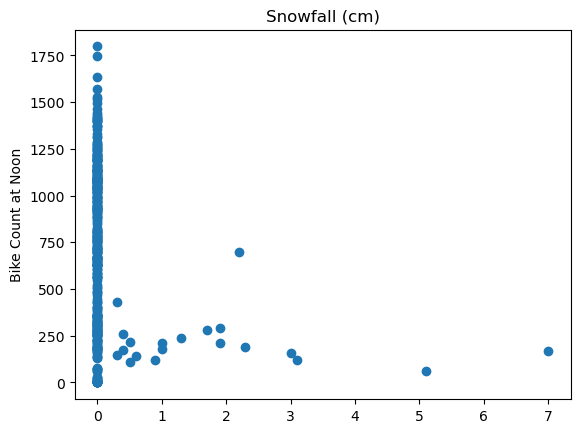

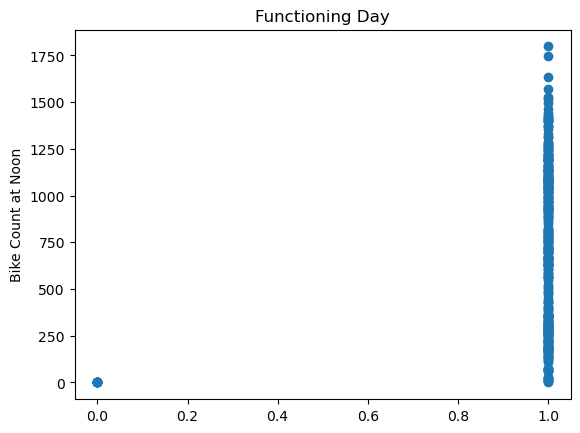

In [3]:
# now we are going to plot to see which one of these have linear relationship wrt bike count

for labels in df.columns[1:]:
    plt.scatter(df[labels], df['Rented Bike Count'])
    plt.title(labels)
    plt.ylabel('Bike Count at Noon')
    plt.show()

In [4]:
df = df.drop(['Functioning Day', 'Snowfall (cm)', 'Rainfall(mm)', 'Visibility (10m)', 'Wind speed (m/s)'], axis = 1)

In [5]:
df.head()
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)),int(0.8*len(df))])

In [6]:
df.head()

,Rented Bike Count,Temperature(C),Humidity(%),Dew point temperature(C),Solar Radiation (MJ/m2)
12,449,1.7,23,-17.2,1.11
36,479,4.3,41,-7.8,1.09
60,333,5.8,85,3.4,0.43
84,393,-0.3,38,-12.9,1.11
108,321,-2.3,25,-19.7,0.00


In [7]:
def ScaleDataSet (data):
    X = data.iloc[:,1:]
    y = data.iloc[:,0:1]
    X = np.array(X)
    y = np.array(y)
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    data = np.hstack((X,np.reshape(y, (-1,1))))
    
    return data, X, y   

In [8]:
train, x_train, y_train = ScaleDataSet(train)
valid, x_valid, y_valid = ScaleDataSet(valid)
test, x_test, y_test = ScaleDataSet(test)

In [9]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [20]:
y_pred = lr.predict(x_test)
y_pred = np.reshape(y_pred, (-1,))
y_test = np.reshape(y_test, (-1,))
print(y_test)
print(y_pred)
print("Score: ", lr.score(x_test, y_test))
#MSE 
print("MSE: ", np.mean((y_test-y_pred)**2))
print(lr.coef_, lr.intercept_)

[ 769  655  648  479  185    0  666 1258  263  191  664  218  192 1220
    0    0  632  281  705  907  311 1139 1525 1193 1273 1088   62 1216
  325  697  143  202  174   10  650 1034 1088  363  504  267  311  952
  770 1328   17  754  967  565  971  925    0 1256  673  431    0  230
 1573 1315 1019 1237  630  944  759  172    0 1462  321  991  221  240
 1132 1058  982]
[ 327.12039397 1237.11220633  696.55451057  470.67082413  270.60058706
  823.28623065  745.40000917  992.29937992  430.09591873  359.89377473
  530.07278037  401.99717677  426.92342818 1085.23971904 1008.79296408
  878.58891324  980.68262843  550.46816762  791.85878545  724.32656178
  578.3465113  1141.9403134  1120.28185583 1075.29686766  981.25350706
  841.55705976  -38.50050199 1060.6547521   406.31464947  372.99921369
  403.85937627  372.31913188  109.80401731  117.05247401  682.80325508
  735.62361774  843.97300182  559.58434207  747.53307045  128.75163063
  363.77271295 1166.57390741  955.75840316 1143.56852724  18

In [19]:
# Linear regression using nueral network 
# A Normalization layer should always either be adapted over a dataset or passed mean and variance.

normalizer = tf.keras.layers.Normalization(input_shape=(4,), axis = -1)
normalizer.adapt(x_train)

nnLR_model = tf.keras.Sequential([
    normalizer, 
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1)    
])
nnLR_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='mean_squared_error')
history = nnLR_model.fit(x_train, y_train, epochs=100, validation_data=(x_valid, y_valid), verbose=0)

In [17]:
def plot_history(history):
    #plt.plot(history.history['accuracy'], label='accuracy')
    #plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.legend()
    plt.show()

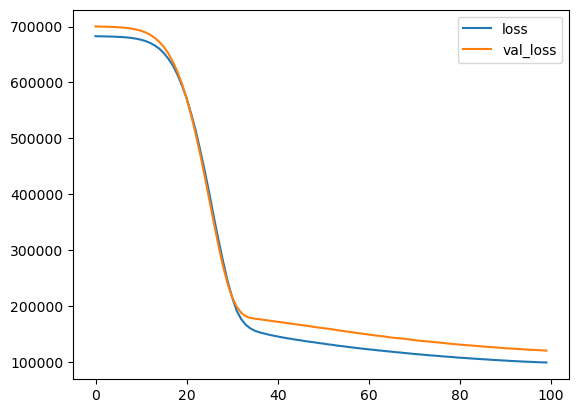

3/3 [==============================] - 0s 5ms/step
[[ 324.0703 ]
 [1254.2168 ]
 [ 662.7873 ]
 [ 400.4698 ]
 [ 341.2776 ]
 [ 805.9286 ]
 [ 676.7672 ]
 [1018.6192 ]
 [ 546.5703 ]
 [ 376.04224]
 [ 598.4078 ]
 [ 445.2507 ]
 [ 412.17227]
 [1107.8397 ]
 [ 960.50146]
 [ 831.1209 ]
 [ 951.5224 ]
 [ 458.8021 ]
 [ 726.79767]
 [ 662.12006]
 [ 494.2453 ]
 [1140.258  ]
 [1117.706  ]
 [1038.9576 ]
 [ 968.3923 ]
 [ 786.0334 ]
 [ 286.1551 ]
 [1078.624  ]
 [ 335.30988]
 [ 339.19965]
 [ 400.80594]
 [ 377.1803 ]
 [ 291.97675]
 [ 311.99374]
 [ 570.92804]
 [ 641.7297 ]
 [ 880.5229 ]
 [ 481.7222 ]
 [ 705.65656]
 [ 301.1217 ]
 [ 311.35562]
 [1255.394  ]
 [ 928.4545 ]
 [1128.4214 ]
 [ 320.06277]
 [1004.1309 ]
 [ 826.0317 ]
 [1062.8965 ]
 [ 676.62537]
 [ 542.22565]
 [ 615.1878 ]
 [ 780.6714 ]
 [ 514.3538 ]
 [ 312.86652]
 [ 923.0253 ]
 [ 413.3546 ]
 [1057.8597 ]
 [ 580.867  ]
 [1060.5508 ]
 [1056.4225 ]
 [ 419.84863]
 [1004.1213 ]
 [1203.3293 ]
 [ 430.50275]
 [ 825.75055]
 [1136.3915 ]
 [ 440.43643]
 [ 666.0523

In [23]:
plot_history(history)
y_pred = nnLR_model.predict(x_test)
print(y_pred)
# MSE
print("MSE: ", np.mean((y_test-y_pred)**2))